## Pagerank
PageRank (PR) adalah algoritma pencarian yang digunakan oleh Google Search untuk memberi peringkat halaman web, dalam mengukur seberapa pentingnya bagi pengguna di hasil mesin pencarian mereka.

Menurut Google:

PageRank bekerja dengan menghitung jumlah dan kualitas tautan ke suatu halaman untuk menentukan perkiraan kasar seberapa penting situs web tersebut. Asumsi yang mendasarinya adalah bahwa situs web yang lebih penting cenderung menerima lebih banyak tautan dari situs web lainnya.

Saat ini, PageRank bukan satu-satunya algoritma pencarian yang digunakan oleh Google untuk mengurutkan hasil penelusuran, tetapi merupakan algoritma pertama yang digunakan oleh perusahaan itu, dan merupakan algoritma yang paling terkenal.Mulai 24 September 2019, PageRank dan semua paten terkaitnya sudah kedaluwarsa, sehingga tak dipakai lagi

# Page Rank
PageRank adalah algoritma yang dibuat oleh Larry Page. Algoritma ini digunakan oleh mesin pencarian Google yang memberikan bobot numerik untuk setiap elemen dari kumpulan dokumen hyperlink seperti Word Wide Web dengan tujuan untuk mengukur hubungan kepentingan dalam kumpulan dokumen tersebut. Dalam algoritma PageRank dihasilkan matriks yang menghitung probabilitas bahwa pengguna akan berpindah dari satu halaman ke halaman lainnya.

# Algoritma Page Rank
1. Analisis Tautan: Algoritma memulai dengan menganalisis struktur tautan di web. Ia melihat semua tautan dari satu halaman ke halaman lain di internet.
2. Nilai Awal: Setiap halaman web awalnya diberi nilai peringkat yang sama.
3. Perhitungan Iteratif:
*  Untuk setiap halaman 𝑃, PageRank mendistribusikan nilai peringkat dari
𝑃 ke semua halaman yang ditautkan olehnya.
*  Jumlah nilai peringkat yang diberikan dari 𝑃 ke sebuah halaman yang ditautkannya sebanding dengan jumlah tautan keluar dari 𝑃.
*  Proses ini diulang secara iteratif hingga nilai peringkat stabil.
4. Faktor Redaman: Untuk memperhitungkan kemungkinan bahwa pengguna mungkin melompat secara acak ke halaman lain alih-alih mengikuti tautan diperkenalkan faktor redaman 𝑑 Faktor ini biasanya diatur sekitar 0,85. Rumus PageRank adalah:





$$
\begin{equation}
PR(P_i) = \frac{1 - d}{N} + d \sum_{P_j \in M(P_i)} \frac{PR(P_j)}{L(P_j)}
\end{equation}
$$

## Konsep
Banyak cara digunakan search engine dalam menentukan kualitas/rangking sebuah halaman web, mulai dari penggunaan META Tags, isi dokumen, penekanan pada content dan masih banyak teknik lain atau gabungan teknik yang mungkin digunakan. Link popularity, sebuah teknologi yang dikembangkan untuk memperbaiki kekurangan dari teknologi lain (Meta Keywords, Meta Description) yang bisa dicurangi dengan halaman yang khusus di desain untuk search engine atau biasa disebut doorway pages. Dengan algoritma ‘PageRank’ ini, dalam setiap halaman akan diperhitungkan inbound link (link masuk) dan outbound link (link keuar) dari setiap halaman web.

PageRank, memiliki konsep dasar yang sama dengan link popularity, tetapi tidak hanya memperhitungkan “jumlah” inbound dan outbound link. Pendekatan yang digunakan adalah sebuah halaman akan diangap penting jika halaman lain memiliki link ke halaman tersebut. Sebuah halaman juga akan menjadi semakin penting jika halaman lain yang memiliki rangking (pagerank) tinggi mengacu ke halaman tersebut.

Dengan pendekatan yang digunakan PageRank, proses terjadi secara rekursif dimana sebuah rangking akan ditentukan oleh rangking dari halaman web yang rangkingnya ditentukan oleh rangking halaman web lain yang memiliki link ke halaman tersebut. Proses ini berarti suatu proses yang berulang (rekursif). Di dunia maya, ada jutaan bahkan milyaran halaman web. Oleh karena itu sebuah rangking halaman web ditentukan dari struktur link dari keseluruhan halaman web yang ada di dunia maya. Sebuah proses yang sangat besar dan komplek.

#### komputasi untuk menghitung pagerank
(gunakan error untuk menghentikan literasi
menggunakan root sum square error)

## Implementasi
dari algoritma tersebut dapat di dapat matrik yang di hasilkan dari banyaknya edge atau link yang menghubungkan page satu dengan page lainnya.

yaitu matriks A yang menyatakan hubungan page 1 2 3 dan 4:

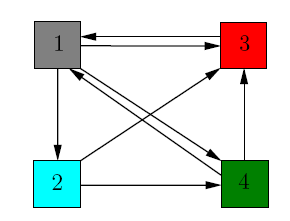

$$
A = \begin{bmatrix}
0 & 0 & 1 & \frac{1}{2} \\
\frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{3} & \frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{3} & \frac{1}{2} & 0 & 0 \\
\end{bmatrix}
$$


Untuk mengetahui urutan page yang memiliki pengaruh penting atau yang banyak di rujuk oleh page” lainnya di gunakannlah algoritma PageRank dengan mengalikan matrik A dengan V sebagai indikator. V adalah matrik n X 1 yang memiliki jumlah total 1 dengan n yaitu banyaknya page yang di bandingkan.

dari hasil perkalian A X V menghasilkan Vn dengan n adalah jumlah iterasi yang dilakukan Vn nantinya akan di kalikan kembali dengan A sehingga menghasilkan angka dengan Vn-(Vn-1) memiliki selisih sedikit atau sama dengan dengan nilai toleransi lebih kecil memperngaruhi ke akuratan data yang di dapatkan nantinya

In [ ]:
import numpy as np

def pagerank(A, d=0.85, tol=1e-6, max_iter=100):
    n = len(A)
    M = np.zeros((n, n))
    for i in range(n):
        row_sum = sum(A[i])
        if row_sum == 0:
            M[i] = np.ones(n) / n
        else:
            M[i] = A[i] / row_sum

    v = np.ones(n) / n
    last_v = np.ones(n) * np.inf

    iter = 0
    while np.sqrt(np.sum((v - last_v) ** 2)) > tol and iter < max_iter:
        last_v = v
        v = d * np.dot(M, v) + (1 - d) / n
        iter += 1

    return v

# Contoh penggunaan:
# Matriks adjacency
A = np.array([[0,0,1,1/2], [1/3, 0 ,0 ,0], [1/3,1/2,0,1/2],[1/3,1/2,0,0]])

# Hitung PageRank
hasil_pagerank = pagerank(A)
print("PageRank:", hasil_pagerank)


PageRank: [0.25 0.25 0.25 0.25]


# Contoh Penerapan untuk Mencari Pagerank dalam Code

In [ ]:
import numpy as np
A = np.array([[0,0,1,1/2], [1/3, 0 ,0 ,0], [1/3,1/2,0,1/2],[1/3,1/2,0,0]])
v = np.array([[0.25], [0.25], [0.25], [0.25]])
print ('A x v=\n', A@v)
print ('A^2 x v=\n', A@A@v)
print ('A x (Av)=\n', A@(A@v))
print ('A^3 x v=\n', A@A@A@v)
print ('A^4 x v=\n', A@A@A@A@v)
print ('A^5 x v=\n', A@A@A@A@A@v)
print ('A^6 x v=\n', A@A@A@A@A@A@v)
print ('A^7 x v=\n', A@A@A@A@A@A@A@v)
print ('A^8 x v=\n', A@A@A@A@A@A@A@A@v)

A x v=
 [[0.375     ]
 [0.08333333]
 [0.33333333]
 [0.20833333]]
A^2 x v=
 [[0.4375    ]
 [0.125     ]
 [0.27083333]
 [0.16666667]]
A x (Av)=
 [[0.4375    ]
 [0.125     ]
 [0.27083333]
 [0.16666667]]
A^3 x v=
 [[0.35416667]
 [0.14583333]
 [0.29166667]
 [0.20833333]]
A^4 x v=
 [[0.39583333]
 [0.11805556]
 [0.29513889]
 [0.19097222]]
A^5 x v=
 [[0.390625  ]
 [0.13194444]
 [0.28645833]
 [0.19097222]]
A^6 x v=
 [[0.38194444]
 [0.13020833]
 [0.29166667]
 [0.19618056]]
A^7 x v=
 [[0.38975694]
 [0.12731481]
 [0.29050926]
 [0.19241898]]
A^8 x v=
 [[0.38671875]
 [0.12991898]
 [0.28978588]
 [0.19357639]]
